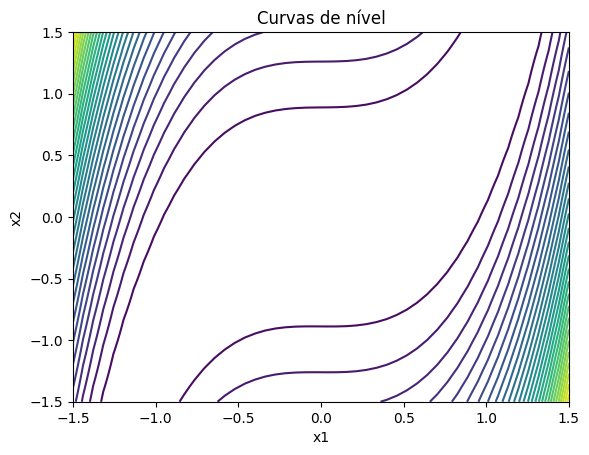

It.: 1, x1 = -0.9978, x2 = -1.0000, f(x) = 3.9955
It.: 2, x1 = -0.8967, x2 = -0.6978, f(x) = 3.6513
It.: 3, x1 = -0.8609, x2 = -0.6019, f(x) = 3.5931
It.: 4, x1 = -0.8391, x2 = -0.5585, f(x) = 3.4862
It.: 5, x1 = -0.8041, x2 = -0.4982, f(x) = 3.3022
It.: 6, x1 = -0.7070, x2 = -0.3147, f(x) = 3.0636
It.: 7, x1 = -0.6399, x2 = -0.2468, f(x) = 2.7126
It.: 8, x1 = -0.5710, x2 = -0.1529, f(x) = 2.5791
It.: 9, x1 = -0.5060, x2 = -0.0991, f(x) = 2.3609
It.: 10, x1 = -0.4250, x2 = -0.0691, f(x) = 2.0364
It.: 11, x1 = -0.3413, x2 = -0.0110, f(x) = 1.8820
It.: 12, x1 = -0.2267, x2 = 0.0283, f(x) = 1.6646
It.: 13, x1 = -0.1233, x2 = 0.0210, f(x) = 1.3144
It.: 14, x1 = 0.1253, x2 = 0.0265, f(x) = 0.8253
It.: 15, x1 = 0.2687, x2 = 0.0224, f(x) = 0.5357
It.: 16, x1 = 0.3484, x2 = 0.0266, f(x) = 0.4492
It.: 17, x1 = 0.4036, x2 = 0.0408, f(x) = 0.4178
It.: 18, x1 = 0.4304, x2 = 0.0602, f(x) = 0.3625
It.: 19, x1 = 0.4827, x2 = 0.1027, f(x) = 0.2772
It.: 20, x1 = 0.5271, x2 = 0.1327, f(x) = 0.2427
It.: 

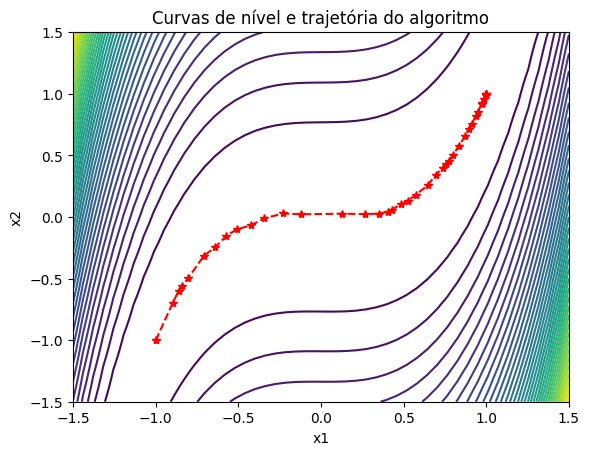

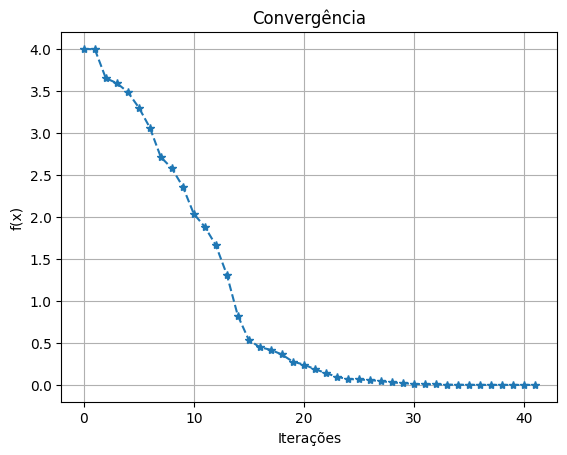

In [1]:
# Bibliotecas necessárias
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as opt

# Definição da malha para plotar o gráfico de curva de nível
x1, x2 = np.meshgrid(np.linspace(-1.5, 1.5), # Limites da variável x1
                     np.linspace(-1.5, 1.5)) # Limites da variável x1

# Calculando a função objetivo para o gráfico de curva de nível
f = 100*(x2-x1**3)**2 + (1-x1)**2

# Plotando o gráfico de curva de nível
plt.contour(x1, x2, f, levels=30)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Curvas de nível')
plt.show()

# Definição da função que implementa a função objetivo
# e será utilizada no algoritmo de otimização (necessário)
def fx(x):
    x1, x2 = x[0], x[1]
    f = 100*(x2-x1**3)**2 + (1-x1)**2
    return f

x0 = np.array([-1, -1]) # Ponto inicial p/ algoritmo
xopt = [x0.tolist()] # Lista de pontos por iteração (trajetória)
fxopt = [fx(x0)] # Avaliação de cada ponto da lista
it = 1 # Contador de iteração p/ fins de impressão na tela

# Esta função é apenas uma gambiarra para salvar o ponto de cada
# iteração e sua avaliação além de permitir imprimir na tela
# os dados de cada iteração
def callback(x):
    global xopt, fxopt
    xopt.append(x.tolist())
    fxopt.append(fx(x))
    if True: # Coloque False se quiser bloquear as impressões na tela
        global it
        message = 'It.: %d, ' % it
        message += 'x1 = %.4f, ' % x[0]
        message += 'x2 = %.4f, ' % x[1]
        message += 'f(x) = %.4f' % fx(x)
        print(message)
        it += 1

# Exemplo de uso do método BFGS
result = opt.minimize(fx,
                      x0=x0,
                      callback=callback,
                      tol=1e-3, # Critério de parada: quando o elemento
                                # com maior valor absoluto no gradiente
                                # for menor que tol.
                      method='BFGS',
                      options={'maxiter': 100}) # Número máximo de iterações permitido
    
# Exemplo de uso do método Nelder-Mead Simplex
# result = opt.minimize(fx,
#                       x0=x0,
#                       callback=callback,
#                       tol=1e-3, # Critério de parada: quando o maior valor absoluto
#                                 # das diferenças nas avaliações entre pares de pontos do simplex
#                                 # e quando o maior valor absoluto das diferenças
#                                 # das variáveis de cada par de ponto do simplex 
#                                 # ambas forem menor que tol. Em outras palavras:
#                                 # max(|x[i]-x[0]|) <= tol & max(|f(x[i])-f(x[0])|) <= tol
#                                 # para todo 0 < i <= n+1 onde n+1 é o número de pontos do simplex.
#                       method='Nelder-Mead',
#                       options={'maxiter': 100, # Número máximo de iterações permitido
#                                'maxfev': 200}) # Número máximo de avaliações permitido

# Exemplo de uso do método do Gradient Conjugado
# result = opt.minimize(fx,
#                       x0=x0,
#                       callback=callback,
#                       tol=1e-3, # Critério de parada: quando o elemento
#                                 # com maior valor absoluto no gradiente
#                                 # for menor que tol.
#                       method='CG',
#                       options={'maxiter': 100}) # Número máximo de iterações permitido

# Visualizar objeto com informações do resultado da otimização
print('\nSee the result object:\n', result)

# Plotar trajetória do algoritmo nas curvas de nível
plt.contour(x1, x2, f, levels=40)
xopt = np.array(xopt)
plt.plot(xopt[:, 0], xopt[:, 1], '--*r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Curvas de nível e trajetória do algoritmo')
plt.show()

# Plotar convergência do algoritmo
plt.plot(fxopt, '--*')
plt.title('Convergência')
plt.xlabel('Iterações')
plt.ylabel('f(x)')
plt.grid()
plt.show()